In [1]:
### 0. Load Required Packages and Utility Functions
defaultW = getOption("warn") 
options(warn = -1) 
options(scipen = 10000)
suppressPackageStartupMessages({
    library(rstan)
    options(mc.cores = parallel::detectCores())
    rstan_options(auto_write = TRUE)
    Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

    library(brms)
    library(lme4)
    library(here)
    library(tidyverse)
    library(tidybayes)
    library(bayesplot)
    library(lubridate)
    library(zoo)
    library(foreach)
    library(doParallel)
    library(doSNOW)
})

source("Packages/Utility_Functions_MMM.R")
source('Packages/Common_functions/common_functions_mmm.R')
source('Optimization_functions/compute_elasticity_&_contribution.r')
source('Optimization_functions/extract_media_params_for_optimization.R')
source('Optimization_functions/plot_model_metrics.R')

In [2]:
#load('model_fits/fit_PP_44_10_C1.RData')
load("RData/data_XyZ_v1.RData")
load("RData/pp_MMM_email_cntrl.RData")

In [3]:
target_cols            = c('gross_add')
media_spend_cols      <- c('digital_spend', 'DRTV_spend_w', 'radio_spend_w','social_spend','dm_spend','paid_search_spend')
media_activity     <- c('cross_channel_imp')

target_norm_cols_vec = c('non_sub')
nbr_period_q <- 13

In [4]:
data_XyZ <- get_quarters(data_XyZ)

`summarise()` has grouped output by 'dma'. You can override using the `.groups` argument.



In [5]:
mean_qy_spend <- data_XyZ %>%
                    select(qy,dma,media_spend_cols,media_activity) %>%
                    group_by(qy,dma) %>%
                    summarize_at(.vars = vars(media_spend_cols,media_activity),.funs = sum) %>%
                    group_by(dma) %>%
                    summarize_at(.vars = vars(media_spend_cols,media_activity),.funs = mean) %>%
                    #mutate_at(.vars = vars(media_spend_cols),.funs = ~./nbr_period_q) %>%
                    as.data.frame()
mean_qy_spend

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(media_spend_cols)` instead of `media_spend_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(media_activity)` instead of `media_activity` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



dma,digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ABILENE, TX",3455.044,9099.7926,3326.4014,4003.295,2898.7891,2033.007,251627.64
"ALEXANDRIA, LA",3377.084,11598.6712,2647.5356,3884.138,2310.0863,1992.616,426186.25
ALL OTHER SUDDENLINK DMA TOTAL,33238.154,29802.0264,8737.6151,18299.324,4999.4896,14668.716,468565.50
"AMARILLO, TX",5260.433,15701.5135,6299.6407,6254.506,5243.4633,2895.462,501356.37
"AUSTIN, TX",13938.251,0.0000,0.0000,5045.501,2195.9991,7654.353,440365.70
"BLUEFIELD-BECKLEY, WV",5180.478,1037.8903,626.8658,4716.487,2028.4340,2264.177,1154076.37
"CHARLESTON-HUNTINGTON, WV",14137.479,2303.5962,3619.0570,12634.027,4936.3834,7028.167,2817350.31
"DALLAS, TX",43992.895,0.0000,4981.0000,18231.389,4959.0867,22890.061,72905.46
"EUREKA, CA",3512.443,359.9369,217.3950,1148.634,986.6742,946.370,255369.18


In [6]:
mean_qy_spend_target <- data_XyZ %>%
                    select(qy,brand,media_spend_cols,media_activity,target_cols) %>%
                    group_by(qy,brand) %>%
                    summarize_at(.vars = vars(media_spend_cols,media_activity,target_cols),.funs = sum) %>%
                    group_by(brand) %>%
                    summarize_at(.vars = vars(media_spend_cols,media_activity,target_cols),.funs = mean) %>%
                    #mutate_at(.vars = vars(media_spend_cols),.funs = ~./nbr_period_q) %>%
                    as.data.frame()
mean_qy_spend_target

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(target_cols)` instead of `target_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



brand,digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp,gross_add
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Optimum,504948.4,353827.3,206745.08,261739.2,180143.29,338414.9,95645763,10658.467
Suddenlink,257692.7,192723.8,73692.08,171476.6,91462.45,133646.4,14504689,5435.867


In [7]:
mean_weekly_spend <- data_XyZ %>%
                     group_by(dma) %>%
                     summarize_at(.vars = vars(media_spend_cols,media_activity), .funs = exclude_zero_spend_weeks)
mean_weekly_spend

dma,digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ABILENE, TX",265.7726,2575.4130,767.6311,307.9458,612.4202,156.38518,19455.745
"ALEXANDRIA, LA",259.7757,3345.7706,620.5162,298.7798,488.0464,153.27815,32952.545
ALL OTHER SUDDENLINK DMA TOTAL,2556.7811,8434.5358,2016.3727,1407.6403,1056.2302,1128.36277,36229.291
"AMARILLO, TX",404.6487,4443.8246,1453.7632,481.1159,1107.7739,222.72785,39168.466
"AUSTIN, TX",1072.1732,0.0000,0.0000,388.1155,463.9435,588.79636,34048.895
"BLUEFIELD-BECKLEY, WV",398.4983,1556.8355,494.8940,362.8067,428.5424,174.16749,89232.709
"CHARLESTON-HUNTINGTON, WV",1087.4984,3455.3942,1206.3523,971.8482,974.2862,540.62821,217836.364
"DALLAS, TX",3384.0689,0.0000,2873.6538,1402.4145,1047.6944,1760.77395,5637.020
"EUREKA, CA",270.1879,539.9053,171.6276,120.4860,314.8960,83.01491,20267.395


In [8]:
##Computing number of weeks spend by DMA
mean_n_weeks <- data_XyZ %>%
                group_by(qy,dma) %>%
                summarize_at(.vars = vars(media_spend_cols,media_activity), .funs = ~sum(ifelse(.!=0,1,0))) %>%
                group_by(dma) %>%
                summarize_at(.vars = vars(media_spend_cols,media_activity), .funs = mean) 
mean_n_weeks

dma,digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ABILENE, TX",13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.933333
"ALEXANDRIA, LA",13.0,3.4666667,4.266667,13.000000,4.733333,13.00000,12.933333
ALL OTHER SUDDENLINK DMA TOTAL,13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.933333
"AMARILLO, TX",13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.800000
"AUSTIN, TX",13.0,0.0000000,0.000000,13.000000,4.733333,13.00000,12.933333
"BLUEFIELD-BECKLEY, WV",13.0,0.6666667,1.266667,13.000000,4.733333,13.00000,12.933333
"CHARLESTON-HUNTINGTON, WV",13.0,0.6666667,3.000000,13.000000,5.066667,13.00000,12.933333
"DALLAS, TX",13.0,0.0000000,1.733333,13.000000,4.733333,13.00000,12.933333
"EUREKA, CA",13.0,0.6666667,1.266667,9.533333,3.133333,11.40000,12.600000


## Calculate the Optimizer bounds based on mean weeks - Q3 2022

In [9]:
#Using updated quarterly logic which impacts DRTV and Radio especially as they have many zero quarters
mean_quarterly_data <- data_XyZ %>% 
                      #dplyr::filter(qy %in% var_spend_period) %>%
                      dplyr::select(qy,dma,media_spend_cols,media_activity) %>%
                      dplyr::group_by(qy,dma) %>%
                      dplyr::summarize_at(.vars = vars(media_spend_cols,media_activity),.funs = sum) %>%
                      dplyr::group_by(dma) %>%
                      dplyr::summarize_at(.vars = vars(media_spend_cols,media_activity),.funs = exclude_zero_spend_weeks) %>%
                      dplyr::ungroup() %>% 
                      dplyr::select(media_spend_cols,media_activity) %>% 
                      #dplyr::rename_at(media_spend_cols,~media_names_vec) %>%
                      as.matrix()
mean_quarterly_data

digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp
3455.044,13649.689,4536.0019,4003.295,2898.7891,2033.007,251627.64
3377.084,17398.007,3610.2758,3884.138,2310.0863,1992.616,426186.25
33238.154,44703.040,11914.9297,18299.324,4999.4896,14668.716,468565.50
5260.433,23552.270,8590.4192,6254.506,5243.4633,2895.462,501356.37
13938.251,0.000,0.0000,5045.501,2195.9991,7654.353,440365.70
5180.478,7784.178,3134.3288,4716.487,2028.4340,2264.177,1154076.37
14137.479,17276.971,6785.7319,12634.027,4936.3834,7028.167,2817350.31
43992.895,0.000,14943.0000,18231.389,4959.0867,22890.061,72905.46
3512.443,2699.527,1086.9748,1435.792,1480.0113,1013.968,255369.18
8165.016,11975.491,4821.9772,4378.597,4585.0147,5813.183,796564.14


In [10]:
mean_weekly_data <-  data_XyZ %>% 
                      dplyr::group_by(dma) %>% 
                      dplyr::select(media_spend_cols,media_activity) %>%  
                      dplyr::summarize_all(exclude_zero_spend_weeks) %>% 
                      dplyr::ungroup() %>% 
                      dplyr::select(media_spend_cols,media_activity) %>% 
                      #dplyr::rename_at(spend_cols_vec,~media_names_vec) %>%
                      as.matrix()
mean_weekly_data

Adding missing grouping variables: `dma`



digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend,cross_channel_imp
265.7726,2575.4130,767.6311,307.9458,612.4202,156.38518,19455.745
259.7757,3345.7706,620.5162,298.7798,488.0464,153.27815,32952.545
2556.7811,8434.5358,2016.3727,1407.6403,1056.2302,1128.36277,36229.291
404.6487,4443.8246,1453.7632,481.1159,1107.7739,222.72785,39168.466
1072.1732,0.0000,0.0000,388.1155,463.9435,588.79636,34048.895
398.4983,1556.8355,494.8940,362.8067,428.5424,174.16749,89232.709
1087.4984,3455.3942,1206.3523,971.8482,974.2862,540.62821,217836.364
3384.0689,0.0000,2873.6538,1402.4145,1047.6944,1760.77395,5637.020
270.1879,539.9053,171.6276,120.4860,314.8960,83.01491,20267.395
628.0781,2395.0982,761.3648,345.6787,1069.8368,447.16790,61590.011


In [11]:
##Number of weeks spent on an average across all quarters - Optimum
period_vec_opt <- plyr::round_any(mean_quarterly_data[17,]/mean_weekly_data[17,],accuracy = 1,ceiling)
period_vec_opt

digital_spend      DRTV_spend_w     radio_spend_w      social_spend 
               13                 6                 5                13 
         dm_spend paid_search_spend cross_channel_imp 
                5                13                14

In [12]:
##Number of weeks spent on an average across all quarters - Suddenlink
period_vec_sdl <- plyr::round_any(colSums(mean_quarterly_data[-17,])/colSums(mean_weekly_data[-17,]),accuracy = 1,ceiling)
period_vec_sdl

digital_spend      DRTV_spend_w     radio_spend_w      social_spend 
               13                 6                 6                13 
         dm_spend paid_search_spend cross_channel_imp 
                5                13                13

In [13]:
period_vec <- rep(13,length(media_spend_cols))
names(period_vec) <- media_spend_cols
period_vec

digital_spend      DRTV_spend_w     radio_spend_w      social_spend 
               13                13                13                13 
         dm_spend paid_search_spend 
               13                13

In [14]:
period_vec['dm_spend'] <- 8
period_vec['DRTV_spend_w'] <- 0
period_vec['radio_spend_w'] <- 0
period_vec

digital_spend      DRTV_spend_w     radio_spend_w      social_spend 
               13                 0                 0                13 
         dm_spend paid_search_spend 
                8                13

In [15]:
sweep(mean_weekly_data[,media_spend_cols],MARGIN = 2,period_vec,'*')

digital_spend,DRTV_spend_w,radio_spend_w,social_spend,dm_spend,paid_search_spend
3455.044,0,0,4003.295,4899.362,2033.007
3377.084,0,0,3884.138,3904.371,1992.616
33238.154,0,0,18299.324,8449.842,14668.716
5260.433,0,0,6254.506,8862.192,2895.462
13938.251,0,0,5045.501,3711.548,7654.353
5180.478,0,0,4716.487,3428.339,2264.177
14137.479,0,0,12634.027,7794.290,7028.167
43992.895,0,0,18231.389,8381.555,22890.061
3512.443,0,0,1566.319,2519.168,1079.194
8165.016,0,0,4493.823,8558.694,5813.183


In [16]:
##Optimum and Suddenlink mean quarterly data
opt_mean_qy_spend <- rowSums(sweep(mean_weekly_data[,media_spend_cols],MARGIN = 2,period_vec,'*'))[17]
opt_mean_qy_spend

[1] 1397227

In [17]:
sdl_mean_qy_spend <- sum(rowSums(sweep(mean_weekly_data[,media_spend_cols],MARGIN = 2,period_vec,'*'))[-17])
sdl_mean_qy_spend

[1] 720373.5

In [18]:
format_money(0.5*opt_mean_qy_spend,0)
format_money(0.7*opt_mean_qy_spend,0)
format_money(1.3*opt_mean_qy_spend,0)
format_money(1.5*opt_mean_qy_spend,0)

[1] "$698,613"

[1] "$978,059"

[1] "$1,816,395"

[1] "$2,095,840"

In [19]:
format_money(0.5*sdl_mean_qy_spend,0)
format_money(0.7*sdl_mean_qy_spend,0)
format_money(1.3*sdl_mean_qy_spend,0)
format_money(1.5*sdl_mean_qy_spend,0)

[1] "$360,187"

[1] "$504,261"

[1] "$936,486"

[1] "$1,080,560"

## NP_22_00_C12_email_cntrl

In [20]:
load('Optimization_results/Optimizer_NP_22_00_C12_email_cntrl.RData')

In [21]:
load('MCMC_objs/MCMC_objs_EVA_NP_22_00_C12_email_cntrl.rda')

In [22]:
MCMC_beta_media <- MCMC_objs$beta_media
MCMC_beta_base_control <- MCMC_objs$beta_base_control
MCMC_alpha_K_S <- MCMC_objs$alpha_K_S
fit_metrics_df <- MCMC_objs$eval_metrics

In [23]:
## Naming the model results with the corresponding actual target name
## Get the geo dfs list
names_geo_df           = ls(pattern='*22_00_C12.*geo_para')
res_geo_df_list        = c()
res_geo_df_list        <- lapply(names_geo_df,FUN = function(x){append(res_geo_df_list,setNames(list(as.data.frame(get(x))),x),0)})
names(res_geo_df_list) = target_cols

## Get the population dfs list
names_pop_df           = ls(pattern='*22_00_C12.*pop_para')
res_pop_df_list        = c()
res_pop_df_list        <- lapply(names_pop_df,FUN = function(x){append(res_pop_df_list,setNames(list(as.data.frame(get(x))),x),0)})
names(res_pop_df_list) = target_cols
target_norm_cols <- 'non_sub'

In [24]:
names_geo_df
names_pop_df

[1] "NP_22_00_C12_email_cntrl_geo_para_stat"

[1] "NP_22_00_C12_email_cntrl_pop_para_stat"

In [25]:
test_extraction <- make_optim_data_mmm(data_XyZ              = data_XyZ,
                                               list_pop_param_df     = res_pop_df_list,
                                               list_geo_param_df     = res_geo_df_list,
                                               target_names_vec      = target_cols,
                                               list_preprocessed_data= pp_MMM_email_cntrl,
                                               media_norm_type       = 2,
                                               target_norm_type      = 2,
                                               pooling_type = 'no',
                                               target_norm_cols = target_norm_cols
                                               )

DMA names:
1 ABILENE, TX
2 ALEXANDRIA, LA
3 ALL OTHER SUDDENLINK DMA TOTAL
4 AMARILLO, TX
5 AUSTIN, TX
6 BLUEFIELD-BECKLEY, WV
7 CHARLESTON-HUNTINGTON, WV
8 DALLAS, TX
9 EUREKA, CA
10 GREENVILLE-NEW BERN, NC
11 HOUSTON, TX
12 JONESBORO, AR
13 LAKE CHARLES, LA
14 LITTLE ROCK, AR
15 LUBBOCK, TX
16 MONROE-ELDORADO, LA
17 NEW YORK, NY
18 ODESSA-MIDLAND, TX
19 OKLAHOMA CITY, OK
20 PARKERSBERG, WV
21 PHOENIX, AZ
22 RALEIGH-DURHAM, NC
23 SAN ANGELO, TX
24 SHREVEPORT, LA
25 SPRINGFIELD, MO
26 ST JOSEPH, MO
27 TULSA, OK
28 TYLER-LONGVIEW, TX
29 VICTORIA, TX
30 WACO-TEMPLE, TX
media names:
1 digital_spend
2 DRTV_spend_w
3 radio_spend_w
4 social_spend
5 dm_spend
6 paid_search_spend
7 cross_channel_imp

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(final_data_cols)` instead of `final_data_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Adding missing grouping variables: `dma_id`, `dma`, `X`

Adding missing grouping variables: `dma_id`, `dma`, `X`

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(control_names_vec)` instead of `control_names_vec` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [26]:
# Outputs from `make_optim_data_mmm`
spend_cols_vec    = test_extraction$gross_add$media$spend_cols_vec
media_names_vec   = test_extraction$gross_add$media$media_names_vec
dma_names_vec     = test_extraction$gross_add$other$dma_names_vec
common_params_df  = test_extraction$gross_add$media$common_params_df
beta_media_mat    = test_extraction$gross_add$media$beta_media_mat
beta_control_mat  = test_extraction$gross_add$control$beta_control_mat
min_media_mat     = test_extraction$gross_add$media$min_media_mat
max_media_mat     = test_extraction$gross_add$media$max_media_mat
prospect_df       = test_extraction$gross_add$other$prospect_df
control_names_vec = test_extraction$gross_add$control$control_names_vec
control_mat       = test_extraction$gross_add$control$control_matrix
target_max_vec    = test_extraction$gross_add$target$target_max_vec
subs_col          = test_extraction$gross_add$other$subs_col
cleaned_names_list = test_extraction$gross_add$media$cleaned_media_names_vec
target_capita_norm_col = test_extraction$gross_add$target$target_capita_norm_col

In [27]:
media_names_vec

[1] "digital"           "DRTV_w"            "radio_w"          
[4] "social"            "dm"                "paid_search"      
[7] "cross_channel_imp"

In [28]:
prospect_mat_media = matrix(1,ncol = length(media_names_vec),nrow = length(dma_names_vec),dimnames  = list(NULL,media_names_vec))
non_sub_media <- media_names_vec[!media_names_vec%in%c('cross_channel_imp')]
prospect_mat_media[,media_names_vec] = prospect_df[['non_sub']]
prospect_mat_media[,'cross_channel_imp'] = prospect_df[['tv_insertable_ue']]

In [29]:
#*************  Simulator for Optimization  ***************************

###################################################################################################################################
#Global parameters needed for optimization
###################################################################################################################################
##Vector of Optimum DMA
optimum_dma =  c('NEW YORK, NY')
non_drtv_dmas = mean_weekly_spend %>%
                mutate(dma_id = row_number(dma)) %>%
                filter(DRTV_spend_w == 0) %>%
                select(dma_id) %>%
                pull()
non_radio_dmas = mean_weekly_spend %>%
                mutate(dma_id = row_number(dma)) %>%
                filter(radio_spend_w == 0) %>%
                select(dma_id) %>%
                pull()

# media_names_vec = c('cross_channel','DM','outbound_call')


##Spend to activity ratio dataframe by DMA and media. Used primarily for activity based models for converting the activity to spend for optimization_ Dim - ndma*nmedia
spend_activity_ratio_dma_df <- as.data.frame(matrix(1, length(dma_names_vec), length(media_names_vec)))
colnames(spend_activity_ratio_dma_df) <- media_names_vec
spend_activity_ratio_dma_df[non_radio_dmas,'radio_w'] <- 0
spend_activity_ratio_dma_df[non_drtv_dmas,'DRTV_w'] <- 0 

##Shape parameters used for GA calculation

K = common_params_df$K
S = common_params_df$S
alpha = common_params_df$alpha


##Spend dataframe
# data.XyZ = read.csv('MMA_final_data_with_30DMAs_v7.csv')
# data.XyZ = data.XyZ %>% 
#             #dplyr::select(-X) %>%
#             dplyr::rename(period = calendar_month, dma = DMA) %>%
#             dplyr::mutate(brand  = ifelse(dma == "NEW YORK, NY", "Optimum", "Suddenlink"),
#                           period = lubridate::as_date(period)) %>% 
#             dplyr::select(brand, dma, period, everything()) %>% 
#             dplyr::arrange(dma, period)


##Count of DMAs,medias and periods
nbr_media    = length(media_names_vec)
nbr_dma      = length(dma_names_vec)
nbr_periods  = data_XyZ %>% select(period) %>% distinct() %>% count(n()) %>% pull()
nbr_period_q = 13
n_weeks_mat = mean_n_weeks %>% rename_at(.vars = vars(spend_cols_vec), .funs = ~media_names_vec) %>% select(media_names_vec) %>% as.matrix()

target_var = 'weekly_gross_adds'
var_id_opt = which(dma_names_vec %in% optimum_dma)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(spend_cols_vec)` instead of `spend_cols_vec` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(media_names_vec)` instead of `media_names_vec` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [30]:
dma_names_vec[non_drtv_dmas]

[1] "AUSTIN, TX"         "DALLAS, TX"         "HOUSTON, TX"       
[4] "OKLAHOMA CITY, OK"  "PHOENIX, AZ"        "RALEIGH-DURHAM, NC"
[7] "TULSA, OK"

In [31]:
n_weeks_mat

digital,DRTV_w,radio_w,social,dm,paid_search,cross_channel_imp
13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.933333
13.0,3.4666667,4.266667,13.000000,4.733333,13.00000,12.933333
13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.933333
13.0,3.5333333,4.333333,13.000000,4.733333,13.00000,12.800000
13.0,0.0000000,0.000000,13.000000,4.733333,13.00000,12.933333
13.0,0.6666667,1.266667,13.000000,4.733333,13.00000,12.933333
13.0,0.6666667,3.000000,13.000000,5.066667,13.00000,12.933333
13.0,0.0000000,1.733333,13.000000,4.733333,13.00000,12.933333
13.0,0.6666667,1.266667,9.533333,3.133333,11.40000,12.600000
13.0,0.6666667,1.266667,12.666667,4.000000,13.00000,12.933333


In [32]:
model_params = list(
'media_params' = list(
'media_names_vec' = media_names_vec,
'beta_media_mat' = beta_media_mat,
'prospect_mat_media' = prospect_mat_media,
'K' = K,
'S' = S,
'alpha' = alpha,
'max_media_mat' = max_media_mat,
'min_media_mat' = min_media_mat,
'cleaned_names_list' = cleaned_names_list,
'spend_activity_ratio_dma_df' = spend_activity_ratio_dma_df,
'spend_cols_vec' = spend_cols_vec,
'n_weeks_mat' = n_weeks_mat
),
'control_params' = list(
'control_mat' = control_mat,
'control_names_vec' = control_names_vec,
'beta_control_mat' = beta_control_mat
),
'target_params' = list(
'target_var' = target_var,
'target_max_vec' = target_max_vec,
'target_capita_norm_col' = target_capita_norm_col
),    
'other_params' = list(
'nbr_period_q' = nbr_period_q,
'dma_names_vec' = dma_names_vec,
'optimum_dma' = optimum_dma
)
)

In [33]:
n_media = length(media_names_vec)
n_geo = length(dma_names_vec)
n_control = length(control_names_vec)

In [34]:
var_media = model_params$media_params$spend_cols_vec
var_media

[1] "digital_spend"     "DRTV_spend_w"      "radio_spend_w"    
[4] "social_spend"      "dm_spend"          "paid_search_spend"
[7] "cross_channel_imp"

In [35]:
fit_metrics_mean_df <- fit_metrics_df %>%
                        mutate(group = toupper(group),
                               metric = toupper(metric)) %>%
                        filter(metric %in% c('R2','MAPE') & sample_type == 'Train') %>%
                        select(dma = group,metric,Mean) %>%
                        spread(metric,Mean)

fit_metrics_mean_df

dma,MAPE,R2
<chr>,<dbl>,<dbl>
"ABILENE, TX",21.804979,0.5008852
"ALEXANDRIA, LA",Inf,0.5112060
ALL OTHER SUDDENLINK DMA TOTAL,16.535458,0.5775417
ALTICE,6.546690,0.7873954
"AMARILLO, TX",30.520738,0.3250721
"AUSTIN, TX",Inf,0.5200729
"BLUEFIELD-BECKLEY, WV",20.953098,0.5248299
"CHARLESTON-HUNTINGTON, WV",17.468293,0.4764813
"DALLAS, TX",18.017650,0.4428464


### Computing using the mean of all parameters - Using All Data

In [36]:
res <- compute_elasticity_and_contribution(model_params = model_params,
                                              mean_qy_spend = mean_qy_spend,
                                            mean_weekly_spend = mean_weekly_spend,
                                           activity_based_media = 'cross_channel_imp',
                                           data_XyZ = data_XyZ,
                                             spend_change = c(0.1,0.3))

`summarise()` has grouped output by 'dma'. You can override using the `.groups` argument.

Adding missing grouping variables: `qy`

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(control_names)` instead of `control_names` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

`summarise()` has grouped output by 'dma'. You can override using the `.groups` argument.

Adding missing grouping variables: `qy`

`summarise()` has grouped output by 'dma'. You can override using the `.groups` argument.

Adding missing grouping variables: `qy`

`summarise()` has grouped output by 'dma'. You can override using the `.groups` argument.

Adding missing grouping variables: `qy`

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(display_order)` instead of `display_order` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.

Order of media:
1.digital
2.DRTV_w
3.radio_w
4.social
5.dm
6.paid_search
7.cross_channel_imp
8.total

In [37]:
res$Elasticity$`Elasticity_up_0.1`

dma,digital,DRTV_w,radio_w,social,dm,paid_search,cross_channel_imp,spend_media_total
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALTICE,0.09,0.17,0.22,0.04,0.33,0.06,0.03,0.13
SUDDENLINK,0.08,0.14,0.16,0.03,0.43,0.03,0.02,0.12
OPTIMUM,0.09,0.20,0.24,0.05,0.27,0.07,0.04,0.14
"ABILENE, TX",0.01,0.18,0.06,0.01,0.08,0.00,0.01,0.08
"ALEXANDRIA, LA",0.00,0.04,0.03,0.01,0.06,0.00,0.01,0.03
ALL OTHER SUDDENLINK DMA TOTAL,0.03,0.03,0.02,0.01,0.01,0.01,0.02,0.02
"AMARILLO, TX",0.01,0.28,0.14,0.01,0.19,0.00,0.02,0.16
"AUSTIN, TX",0.06,NaN,NaN,0.04,0.20,0.01,0.02,0.05
"BLUEFIELD-BECKLEY, WV",0.03,0.49,0.15,0.01,0.23,0.01,0.01,0.08


In [38]:
res$All_metrics_detailed

dma,media,mean_spend,Media_GA,Media_contribution,mean_spend_up_0.1,Media_GA_up_0.1,mean_spend_down_0.1,Media_GA_down_0.1,mean_spend_up_0.3,Media_GA_up_0.3,mean_spend_down_0.3,Media_GA_down_0.3,control_ga,Elasticity_up_0.1,Elasticity_down_0.1,Elasticity_up_0.3,Elasticity_down_0.3
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALTICE,digital,762641,103.66770052,13.55,838905,142.16056551,686377,73.00009892,991433,246.03079712,533849,31.479492606,14835,0.09,0.07,0.11,0.06
ALTICE,DRTV_w,546551,200.43228160,26.20,601206,254.25718261,491896,150.72471445,710516,370.93304931,382586,72.595193709,14835,0.17,0.16,0.18,0.14
ALTICE,radio_w,280437,93.98174392,12.28,308481,128.74525430,252393,66.20940467,364568,221.90361735,196306,28.533214466,14835,0.22,0.18,0.27,0.14
ALTICE,social,433216,25.37353118,3.32,476538,34.88813072,389894,17.84089454,563181,60.92737609,303251,7.697197323,14835,0.04,0.03,0.05,0.02
ALTICE,dm,271606,156.34285242,20.43,298767,206.24019216,244445,114.84570673,353088,332.94027430,190124,54.676704587,14835,0.33,0.27,0.38,0.22
ALTICE,paid_search,472061,41.85376810,5.47,519267,57.35580496,424855,29.53413154,613679,99.53998069,330443,12.847114713,14835,0.06,0.05,0.07,0.04
ALTICE,cross_channel_imp,110150452,143.50041896,18.75,121165497,197.36299425,99135407,100.38011810,143195588,340.41484696,77105316,42.093540705,14835,0.03,0.03,0.04,0.02
ALTICE,spend_media_total,2766512,621.65187774,81.25,3043163,823.64713026,2489861,452.15495085,3596466,1332.27509486,1936558,207.828917404,14835,0.13,0.11,0.15,0.09
ALTICE,Total,112916964,765.15229670,4.90,124208660,1021.01012451,101625268,552.53506895,146792053,1672.68994182,79041875,249.922458109,14835,0.00,0.00,0.00,0.00


In [39]:
mean_metrics_df <- res$All_metrics_detailed %>%
                   left_join(fit_metrics_mean_df)
mean_metrics_df

Joining, by = "dma"



dma,media,mean_spend,Media_GA,Media_contribution,mean_spend_up_0.1,Media_GA_up_0.1,mean_spend_down_0.1,Media_GA_down_0.1,mean_spend_up_0.3,Media_GA_up_0.3,mean_spend_down_0.3,Media_GA_down_0.3,control_ga,Elasticity_up_0.1,Elasticity_down_0.1,Elasticity_up_0.3,Elasticity_down_0.3,MAPE,R2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALTICE,digital,762641,103.66770052,13.55,838905,142.16056551,686377,73.00009892,991433,246.03079712,533849,31.479492606,14835,0.09,0.07,0.11,0.06,6.546690,0.7873954
ALTICE,DRTV_w,546551,200.43228160,26.20,601206,254.25718261,491896,150.72471445,710516,370.93304931,382586,72.595193709,14835,0.17,0.16,0.18,0.14,6.546690,0.7873954
ALTICE,radio_w,280437,93.98174392,12.28,308481,128.74525430,252393,66.20940467,364568,221.90361735,196306,28.533214466,14835,0.22,0.18,0.27,0.14,6.546690,0.7873954
ALTICE,social,433216,25.37353118,3.32,476538,34.88813072,389894,17.84089454,563181,60.92737609,303251,7.697197323,14835,0.04,0.03,0.05,0.02,6.546690,0.7873954
ALTICE,dm,271606,156.34285242,20.43,298767,206.24019216,244445,114.84570673,353088,332.94027430,190124,54.676704587,14835,0.33,0.27,0.38,0.22,6.546690,0.7873954
ALTICE,paid_search,472061,41.85376810,5.47,519267,57.35580496,424855,29.53413154,613679,99.53998069,330443,12.847114713,14835,0.06,0.05,0.07,0.04,6.546690,0.7873954
ALTICE,cross_channel_imp,110150452,143.50041896,18.75,121165497,197.36299425,99135407,100.38011810,143195588,340.41484696,77105316,42.093540705,14835,0.03,0.03,0.04,0.02,6.546690,0.7873954
ALTICE,spend_media_total,2766512,621.65187774,81.25,3043163,823.64713026,2489861,452.15495085,3596466,1332.27509486,1936558,207.828917404,14835,0.13,0.11,0.15,0.09,6.546690,0.7873954
ALTICE,Total,112916964,765.15229670,4.90,124208660,1021.01012451,101625268,552.53506895,146792053,1672.68994182,79041875,249.922458109,14835,0.00,0.00,0.00,0.00,6.546690,0.7873954


In [40]:
activity_based_media

[1] "cross_channel_imp"

In [41]:
using_mean_plts <- gen_contrib_elas_plots(mean_metrics_df,activity_based_media,'Elasticity_up_0.1')

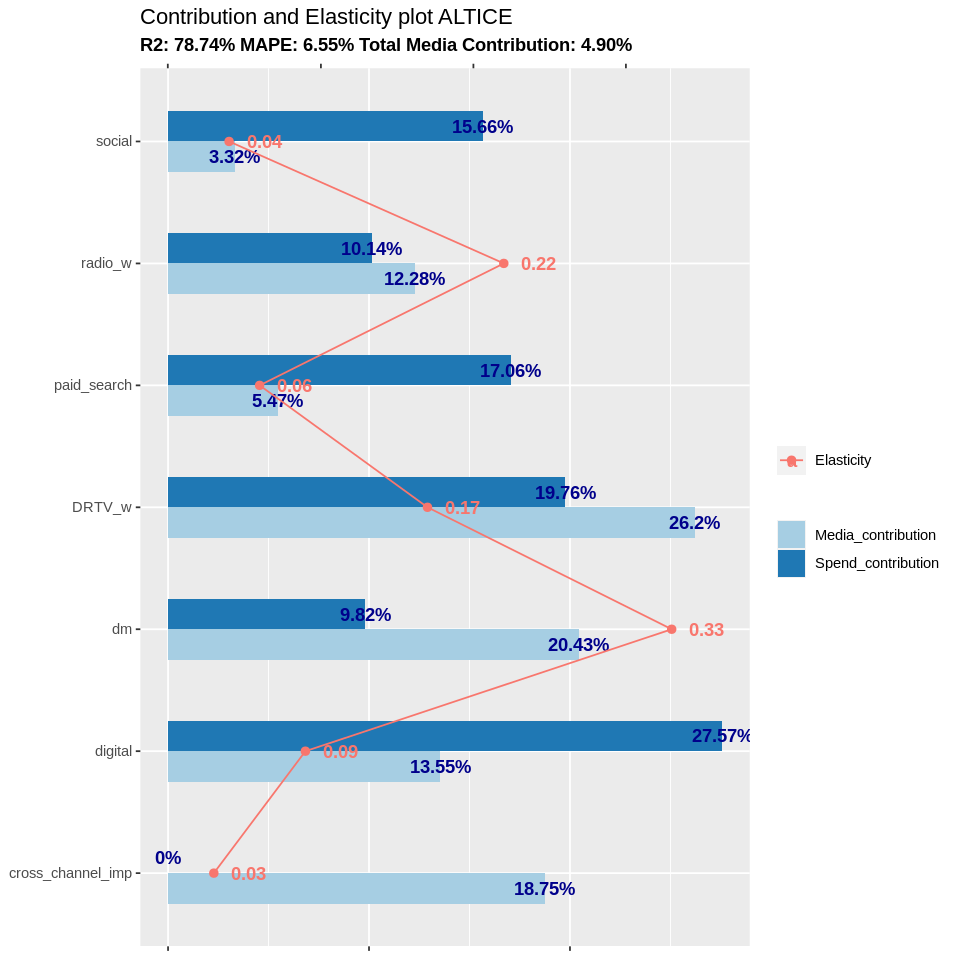

In [42]:
options(repr.plot.width=8, repr.plot.height = 8)
using_mean_plts$brand_plots$ALTICE

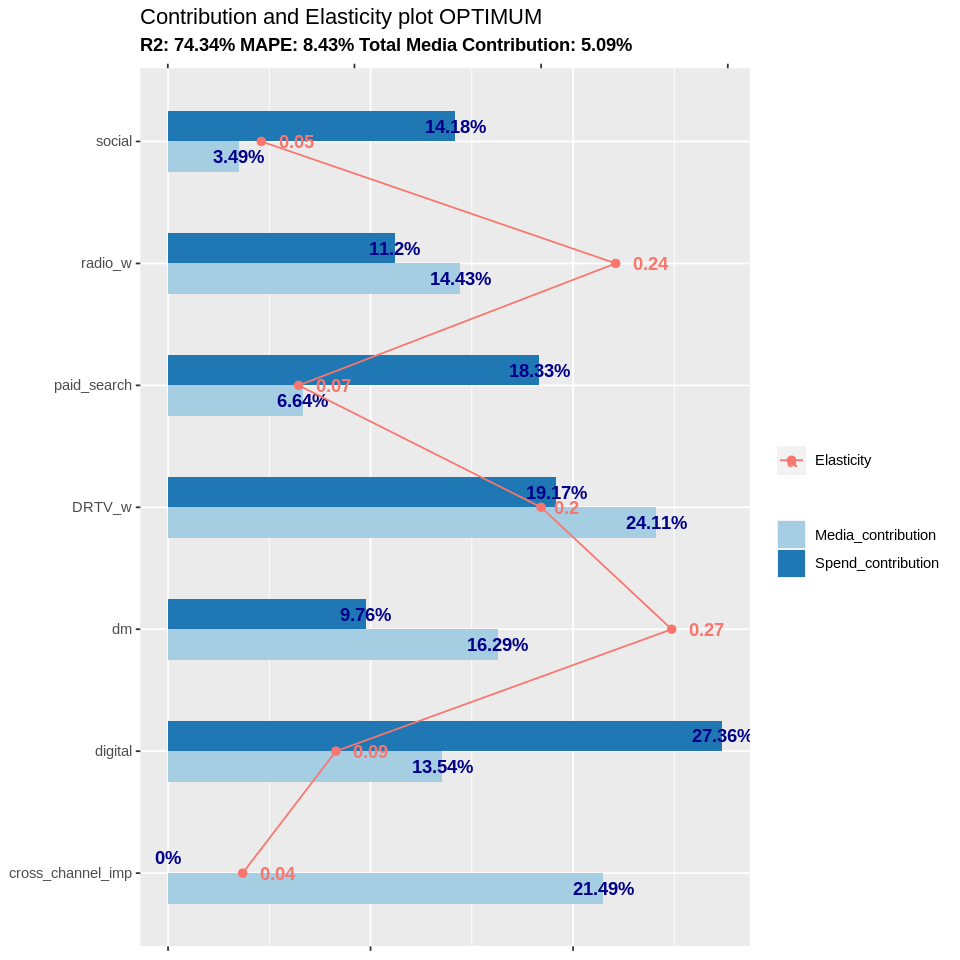

In [43]:
options(repr.plot.width=8, repr.plot.height = 8)
using_mean_plts$brand_plots$OPTIMUM

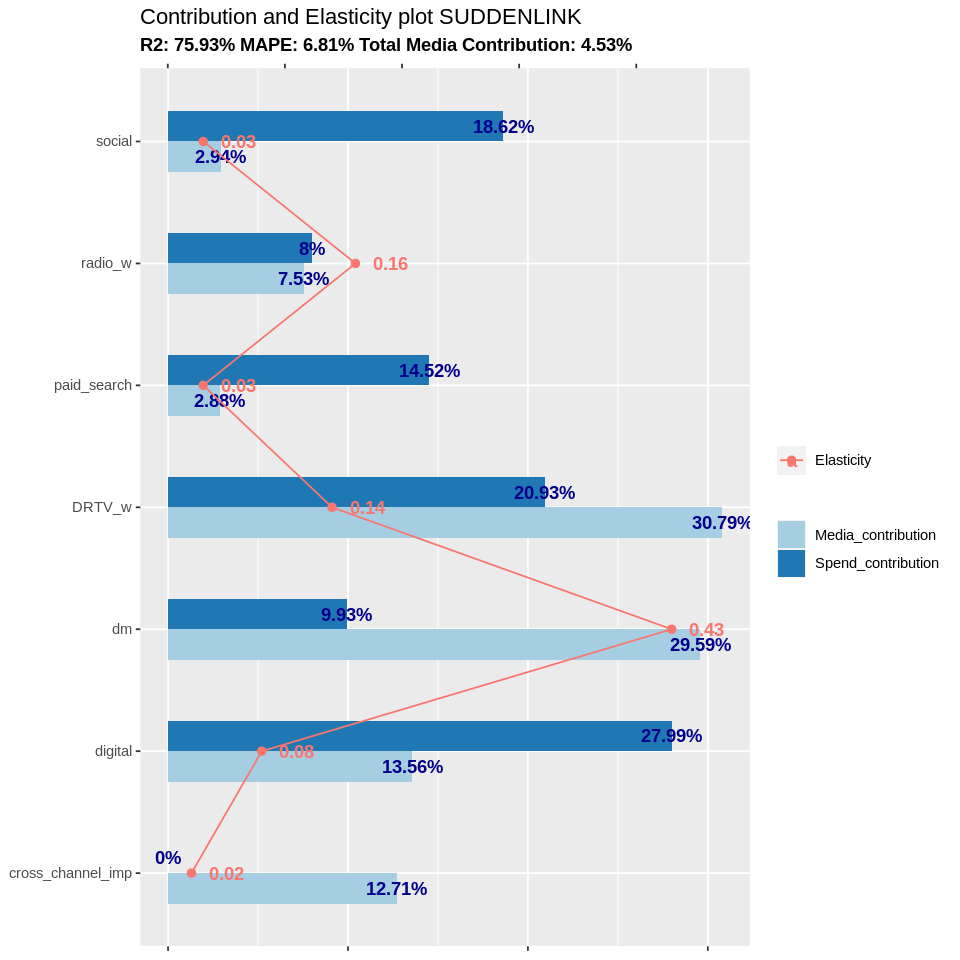

In [44]:
options(repr.plot.width=8, repr.plot.height = 8)
using_mean_plts$brand_plots$SUDDENLINK

In [45]:
save(model_params,file = 'model_params/model_params_NP_22_00_C12_email_cntrl.rda')